## Advertising Project

<p>The sample data we will work with in this project is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.</p>
<p>In this project, our goal will be to determine the relationship (coefficients) between each type of advertisement and the sales. This will allow us to know how much an increase of one unit in a particular type of advertising will increase in sales.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./Data/Advertising.csv')

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<p style="font-size: 22px; font-weight: bold;">Data engineering</p>

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<p style='font-size: 18px;'>--> We can see that the data is already cleaned and is ready for analysis</p>

<p>For the analysis, let's start buy ploting each type of advertising spending vs the sales. This will allow us to see visually how much the variation of each spending type impact the variation of the sales.</p>

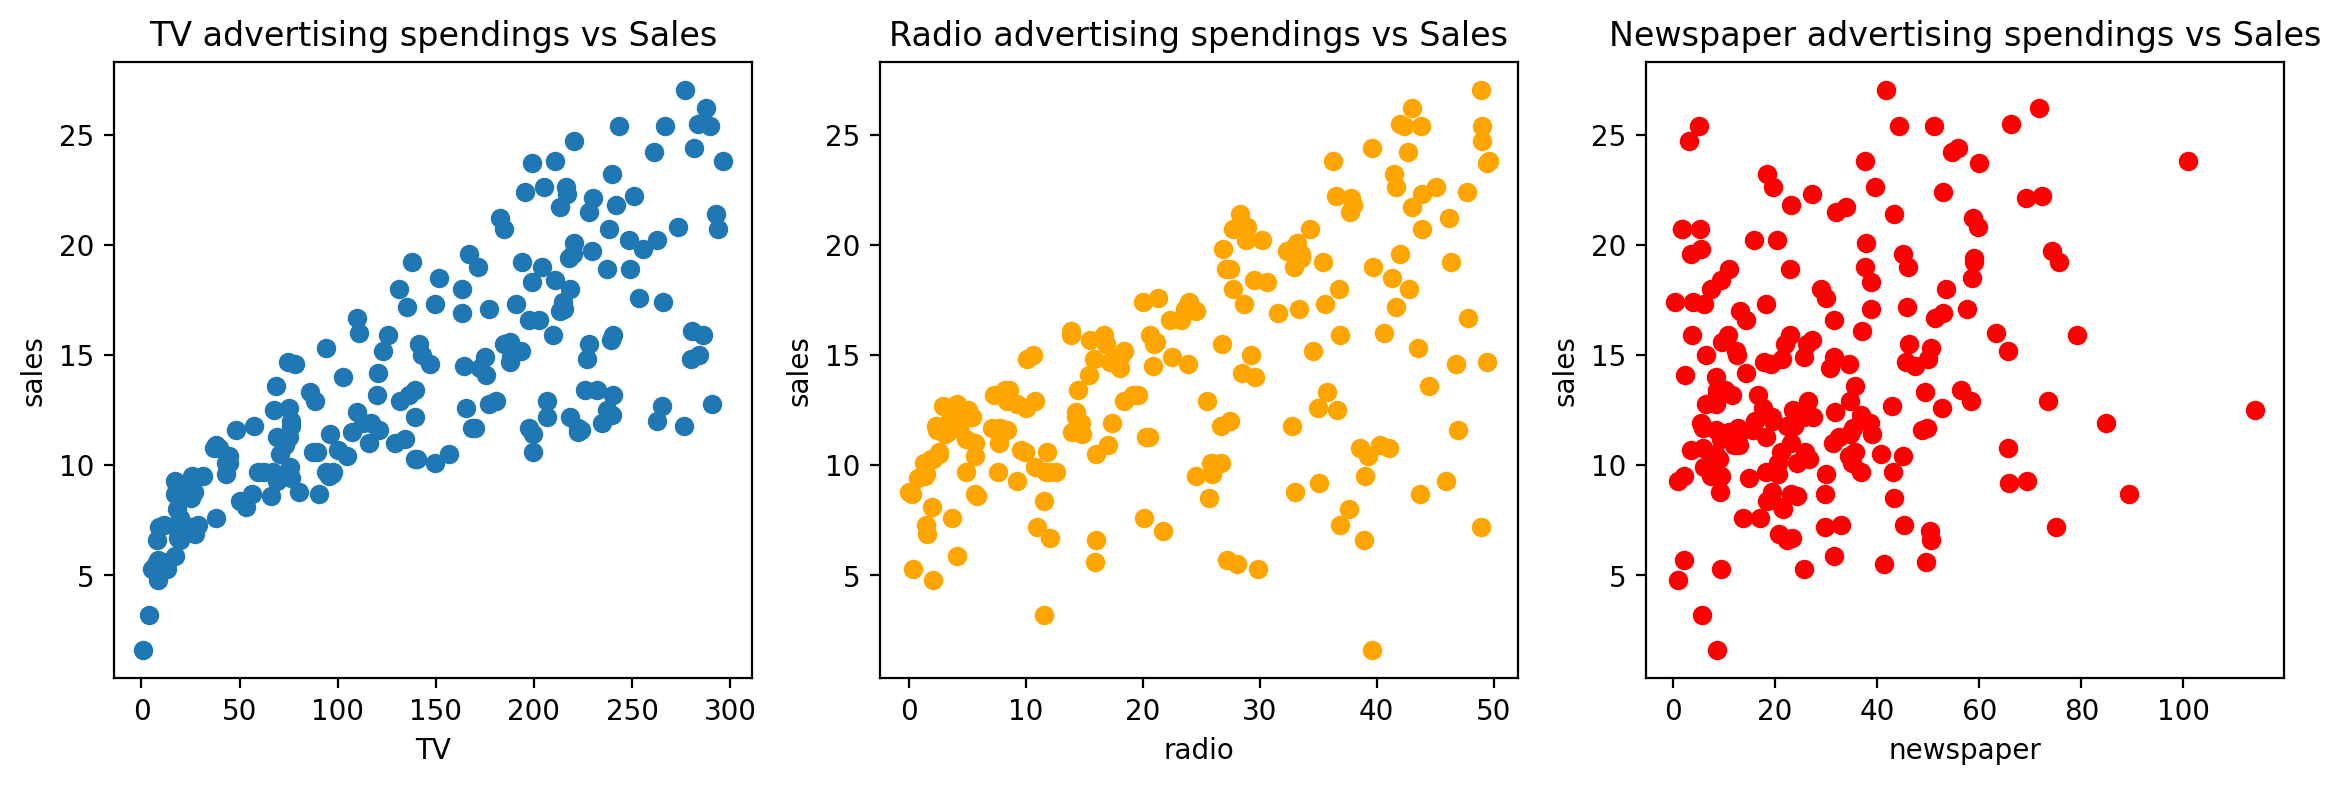

In [225]:
fig, axes = plt.subplots(1,3, figsize=(14,4), dpi=200)

axes[0].scatter('TV', 'sales', data=df)
axes[0].set_title('TV advertising spendings vs Sales')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('sales')

axes[1].scatter('radio', 'sales', data=df, color='orange')
axes[1].set_title('Radio advertising spendings vs Sales')
axes[1].set_xlabel('radio')
axes[1].set_ylabel('sales')

axes[2].scatter('newspaper', 'sales', data=df, color='red')
axes[2].set_title('Newspaper advertising spendings vs Sales')
axes[2].set_xlabel('newspaper')
axes[2].set_ylabel('sales');

<p>The plots show us that TV spendings and radio spendings have a clear linear relationship to the sales. On the other hand, we can see that newspaper spendings do not influence a lot the sales. In other words, the two features have a week correlation.</p>

In [57]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


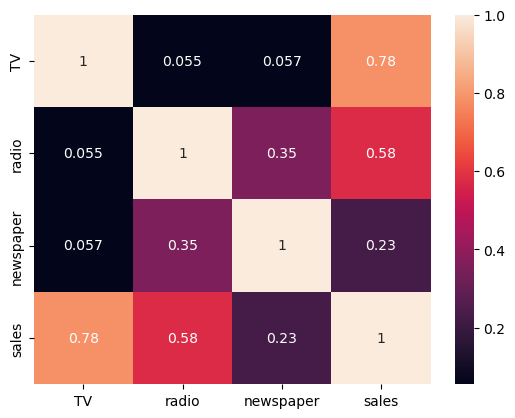

In [219]:
sns.heatmap(df.corr(), annot=True);

<p>As said previously, we notice that the correlation between the sales and the newspaper spending is very weak (0.23)</p>

<p style="font-size: 22px; font-weight: bold;">Model development</p>

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<p>Let's break the dataset into independant features dataframe and dependant feature dataframe</p>

In [71]:
X = df.drop('sales', axis=1)

In [107]:
y = df['sales']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [111]:
model = LinearRegression()

In [113]:
model.fit(X_train, y_train)

LinearRegression()

In [141]:
model.coef_

array([0.0454256 , 0.18975773, 0.00460308])

<p style="font-size: 22px; font-weight: bold;">Model evaluation</p>

In [115]:
y_pred = model.predict(X_test)

In [131]:
MSE = mean_squared_error(y_test, y_pred)

In [133]:
RMSE = np.sqrt(MSE)

In [262]:
print('Root mean squared error:', RMSE)

Root mean squared error: 1.3603977338130544


In [249]:
print('Sales min value:', y.min(), ', Sales max value:', y.max())

Sales min value: 1.6 , Sales max value: 27.0


<p>Comparing the model's RMSE (1.36) to the sales feature range [1.6, 27.0], we can conclude that the RMSE is acceptable. Therefore our model is ready to be use on real world data.</p>

In [137]:
R2_score = r2_score(y_test, y_pred)

In [139]:
R2_score

0.9058622107532247

<p>The gotten R2_score (0.9) show that a very large part of the data variance can be explained by the model. This is another positive signal that our model is ready for the real world unseen data.</p>

<p style="font-size: 22px; font-weight: bold;">Model usage (Example)</p>

<p>Hypopthetic scenario: If we have a budget of $240k, what would be the best way of advertsing spending among the following spendings categorisation.</p>

In [269]:
new_data = pd.DataFrame(data=[[160,40,40], [100,70,70], [125,65,50], [100,100,40]], 
                        columns=['TV', 'radio', 'newspaper'])

In [271]:
new_data

,TV,radio,newspaper
0,160,40,40
1,100,70,70
2,125,65,50
3,100,100,40


In [273]:
data_predicted = model.predict(new_data)

In [275]:
data_predicted

array([17.6953173 , 20.80060573, 20.89539542, 26.3552452 ])

<p><strong></strong>Conclusion: By anlysing the precedent result, we notice that in our case senario, the best way to spend our 240k dollars in advertisment would be: spending 100k dollars in TV advertising, 100k dollars in radio advertising, and 40k dollars in newspaper advertising. In fact, this would increase our sales by 26 thounds units.</p>

In [277]:
#df[df['sales']==27.0]